# Isomap

Visualization technique.  

We need knn's to construct a neighborhood graph, where each point is connected to each of its k-neighbors.  

The graphs edge length (weight) is the Euclidean distance between each point. It is the geodesic distance, ie, the shortest distance between two points on a surface. On a plance, this is the Euclidean distance.

We want to comput the shortest path between two nodes using:  
- Dijkstra's algorithm  
- Floyd-Warshall algorithm  

Then we compute the lower-dimensional embedding using MDS (multidimensional scaling) by default.

## Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

## Get Data

In [44]:
def get_data():
    df = pd.read_csv("crabs.csv")

    # re-format data
    df.rename(columns={
        "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
    }, inplace=True)

    # remap cat var designator
    df["species"] = df["species"].map({
        "B": "Blue", "O": "Orange"
    })

    df["sex"] = df["sex"].map({
        "M": "Male", "F": "Female"
    })

    # Add a species designation, whic is going to be unique combo of sex and species
    df["class"] = df["species"] + df["sex"]

    return df

In [45]:
df = get_data()

# Select data columns
data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Depth"]

df.head()

,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,5,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


## Scale Data

In [46]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy(deep=True)
df_scaled[data_columns] = MinMaxScaler().fit_transform(df_scaled[data_columns])

## Apply to 2D

In [ ]:
from sklearn.manifold import Isomap

df_isomap = df.copy(deep=True)

isomap = Isomap(n_components=2, n_neighbors=10)
df_scaled[["ISOMAP1", "ISOMAP2"]] = isomap.fit_transform(df_scaled[data_columns])
df_scaled.head()

# Error we have with embedding. 
print("Reconstruction Error:\n", isomap.reconstruction_error())

Reconstruction Error:
 0.009501240251169362


## Plot 2D

<Axes: xlabel='ISOMAP1', ylabel='ISOMAP2'>

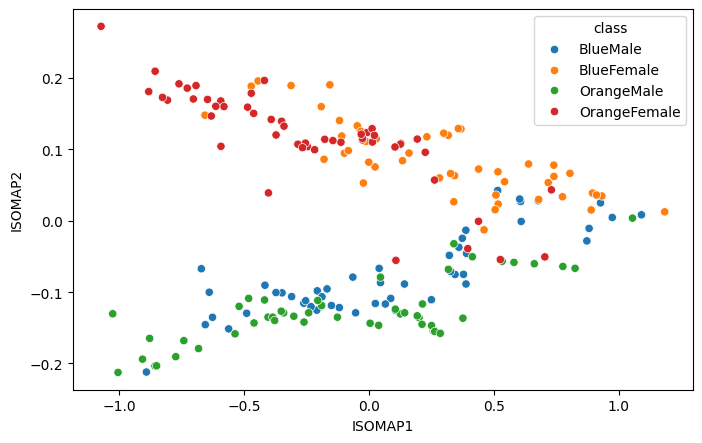

In [48]:
import seaborn as sns

fig = plt.figure(figsize=(8, 8/1.618))

sns.scatterplot(x="ISOMAP1", y="ISOMAP2", hue="class", data=df_scaled)

## Conclusion 1

We can see the class OrangeFemale is very difference from the class OrangeMale for points with lower ISOMAP1 values. This can be backtraced to the original data for the corresponding rows and the original data. For example:  (although it's not quite showing up in the data like I would expect).

OrangeFemale ISOMAP ~ -1
198	199	Orange	Female	49	0.962264	0.781022	0.860182	0.842667	0.883871	OrangeFemale	-0.882489	0.180434
199	200	Orange	Female	50	1.000000	1.000000	0.957447	0.944000	0.967742	OrangeFemale	-1.073383	0.271781

OrangeMale ISOMAP ~ -1
148	149	Orange	Male	49	0.993711	0.751825	0.987842	0.933333	0.993548	OrangeMale	-1.026765	-0.130460
149	150	Orange	Male	50	1.000000	0.671533	1.000000	0.952000	1.000000	OrangeMale	-1.005545	-0.212495

BlueFemale ISOMAP ~ -1
98	99	Blue	Female	49	0.647799	0.744526	0.726444	0.730667	0.703226	BlueFemale	-0.471890	0.187994
99	100	Blue	Female	50	0.754717	0.729927	0.796353	0.821333	0.774194	BlueFemale	-0.657248	0.147431

